In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [17]:
# Load the data
file_path = 'C:\\Users\\singh\\OneDrive\\Desktop\\CustomerSegmentation\\Online Retail.xlsx'
data = pd.read_excel(file_path)
# Display the first few rows of the dataset
print(data.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


Missing values before filling:
InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
Cluster           0
dtype: int64
Missing values after filling:
InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
Cluster           0
dtype: int64
Missing values in features before scaling:
Quantity      0
UnitPrice     0
CustomerID    0
dtype: int64


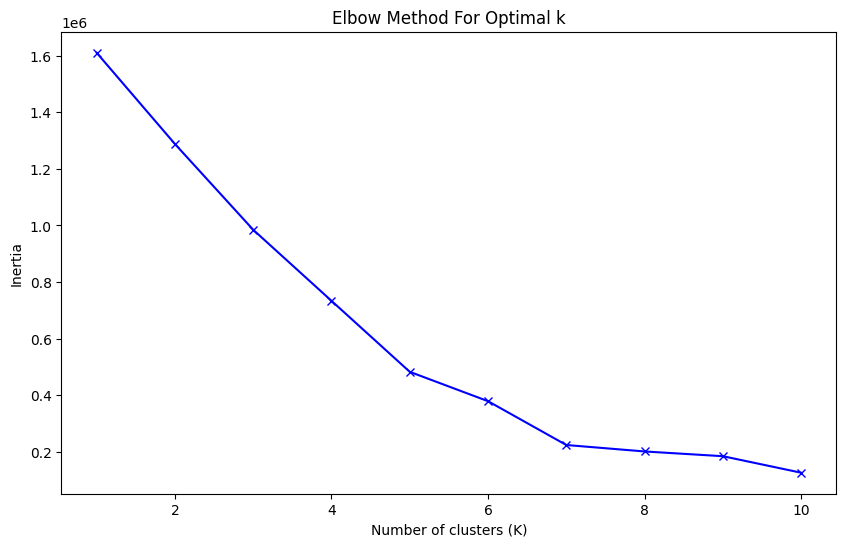

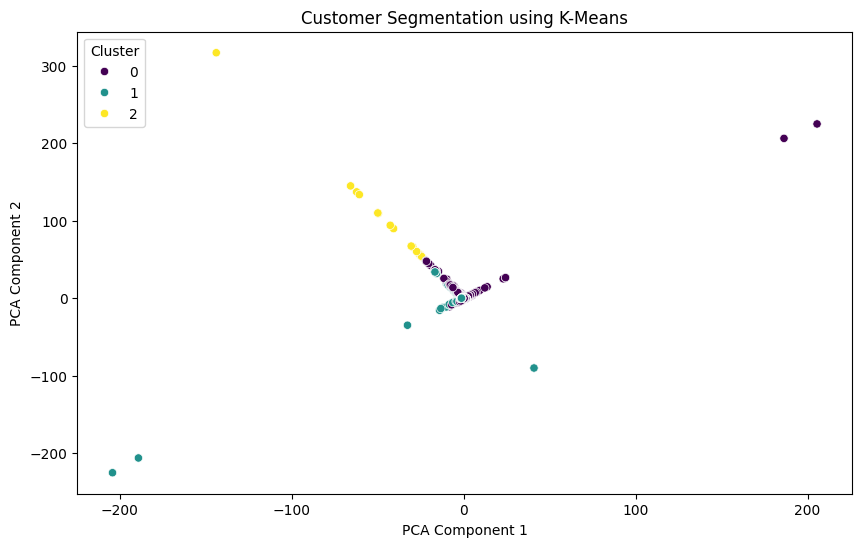

Cluster Analysis:
          Quantity     UnitPrice    CustomerID  Cluster
Cluster                                                
0         7.379880      4.548779  16085.703578      0.0
1        14.206575      3.445455  13639.332085      1.0
2        -0.700000  11971.005500  15389.402456      2.0


In [29]:
# Check for missing values
print("Missing values before filling:")
print(data.isnull().sum())

# Fill missing values only for numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Drop duplicates
data.drop_duplicates(inplace=True)

# Check for missing values after processing
print("Missing values after filling:")
print(data.isnull().sum())

# Select relevant features for clustering (e.g., Quantity, UnitPrice, CustomerID)
features = data[['Quantity', 'UnitPrice', 'CustomerID']]

# Check for missing values in features before scaling
print("Missing values in features before scaling:")
print(features.isnull().sum())

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Verify that there are no NaN values in scaled_features
if np.any(np.isnan(scaled_features)):
    raise ValueError("There are still NaN values in scaled_features.")

# Elbow Method to find optimal K
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit the K-Means model with the chosen K (e.g., K = 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original DataFrame
data['Cluster'] = clusters

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Group by cluster and analyze only numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns  # Ensure numeric columns are selected
cluster_analysis = data.groupby('Cluster')[numeric_cols].mean(numeric_only=True)  # Calculate mean for numeric columns only
print("Cluster Analysis:")
print(cluster_analysis)